In [2]:
from jupyterthemes import jtplot
jtplot.style(theme="chesterish")
import torch
import torch.nn as nn
import torchdiffeq
import matplotlib.pyplot as plt
from torch.nn.functional import mse_loss
import numpy as np 
from tqdm.notebook import tqdm


from torchdiffeq import odeint_adjoint as odeint

In [13]:
class Lambda(nn.Module):
    def forward(self,t,x):
         return x * x 
        
class ODEBlock(nn.Module):
    def __init__(self):
        super(ODEBlock,self).__init__()
        layers =[nn.Linear(1,32),
                 nn.ReLU(),
                 nn.Linear(32,64),
                 nn.ReLU(),
                 nn.Linear(64,64),
                 nn.ReLU(),
                 nn.Linear(64,1)]
        self.net = nn.Sequential(
            *layers
        )
    
    def forward(self,t,x):
        #copy_x = torch.clone(x)
        #for i in range(10):
        #    copy_x = x + self.net(copy_x)
        x = self.net(x)
            
        return x
    
class ODENet(nn.Module):
    def __init__(self, func):
        super(ODENet,self).__init__()
        self.func = func
        self.intergrated_time = torch.Tensor([0.,1.]).float()
    def forward(self,x):
        out = odeint(self.func, x, self.intergrated_time)
        return out[1]
        
def get_batch(X,Y):
    data = torch.stack(X,Y) 
    print(data.shape)


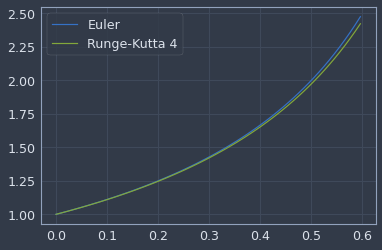

In [24]:
ode_func = Lambda()
t_eu = odeint(ode_func, torch.Tensor([1.]), torch.linspace(0,1,100), method='rk4')
t_rk = odeint(ode_func, torch.Tensor([1.]), torch.linspace(0,1,100), method='euler')
np_eu = t_eu.detach().numpy()[:60]
np_rk = t_rk.detach().numpy()[:60]
np_x = np.linspace(0,1,100)[:60]
plt.plot(np_x, np_eu, label="Euler")
plt.plot(np_x, np_rk, label="Runge-Kutta 4")
plt.legend()
plt.savefig("test.png", format="png")

In [6]:
for i in tqdm(range(epochs)):
    optimizer.zero_grad()
    x = torch.rand((8,1)) * 4 - 2
    y = x ** 3
    pred_y = model(x)
    loss = torch.mean((y - pred_y)**2)
    losses.append(loss.item())
    print(f"Epoch(s) {i+1} | Loss = {losses[-1]}")
    loss.backward()
    optimizer.step()

NameError: name 'epochs' is not defined

In [ ]:
test = np.linspace(-2,2,1000)
plt.plot(test,test**3)
test_y = model(torch.linspace(-2,2,1000).reshape(1000,1))
plt.plot(test,test_y.detach().numpy(),color="r")
plt.show()